# Project: Statistics for Business 

**Bogor, 4th September 2023**

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import _tconfint_generic

c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


***Load Data***

In [2]:
df = pd.read_csv("data_marketing.csv")

df

,ID,Income,HaveChild,TotalProduct
0,5524,58138.0,0,894
1,2174,46344.0,1,10
2,4141,71613.0,0,308
3,6182,26646.0,1,37
4,5324,58293.0,1,234
...,...,...,...,...
2202,10870,61223.0,1,385
2203,4001,64014.0,1,30
2204,7270,56981.0,0,309
2205,8235,69245.0,1,354


# Check the Data Quality
---

In [3]:
# cek missing value
df.isna().sum()

ID              0
Income          0
HaveChild       0
TotalProduct    0
dtype: int64

In [4]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:"missing value"})

,missing value
ID,0
Income,0
HaveChild,0
TotalProduct,0


In [5]:
# cek duplicate data
df.duplicated(['ID']).sum()

0

In [6]:
# data shape
df.shape

(2207, 4)

# Data Exploration
---

Rata-rata dari total barang per kostumer = 256.0
Standar deviasi dari total barang per kostumer = 307.0


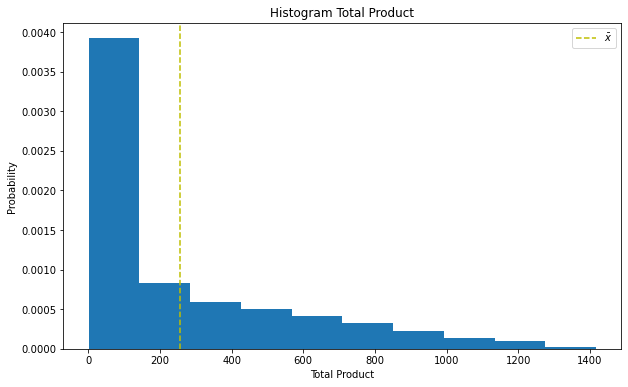

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(df["TotalProduct"], density = True)

mean_prod = np.mean(df["TotalProduct"])
std_prod = np.std(df["TotalProduct"])

print(f"Rata-rata dari total barang per kostumer = {np.round(mean_prod,0)}")
print(f"Standar deviasi dari total barang per kostumer = {np.round(std_prod,0)}")

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

plt.axvline(mean_prod, color ="y", linestyle = "--", label = r"$\bar{x}$")
plt.xlabel('Total Product')
plt.ylabel('Probability')
plt.title('Histogram Total Product')
plt.legend()
plt.show()

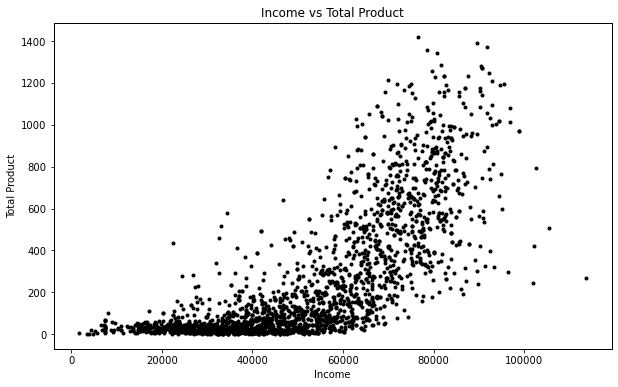

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df["Income"]
y = df["TotalProduct"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels
plt.xlabel("Income")
plt.ylabel("Total Product")

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

# Add a title and adjust the margins
title = "Income vs Total Product"
plt.title(title)

# Show the plot
fig.savefig(title+".png",bbox_inches='tight',transparent=False,dpi=500)
# plt.show()

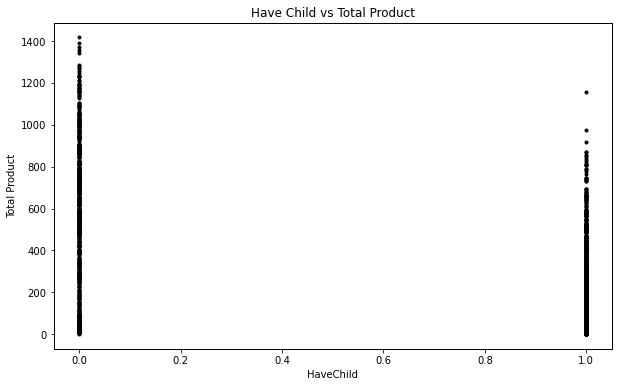

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df["HaveChild"]
y = df["TotalProduct"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels
plt.xlabel("HaveChild")
plt.ylabel("Total Product")

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

# Add a title and adjust the margins
title = "Have Child vs Total Product"
plt.title(title)

# Show the plot
fig.savefig(title+".png",bbox_inches='tight',transparent=False,dpi=500)
plt.show()

# Statistical Test
---

## Mendefinisikan Null Hypothesis ($H_0$) dan Alternative Hypothesis ($H_1$)

Kita ingin membuktikan rata-rata total barang yang dibeli kostumer telah melebihi target dari kepala marketing, yaitu 240.

- Didefinisikan:
    - $\mu$ merupakan rata-rata total produk yang dibeli per kostumer



- Maka definisi dari Null hypothesis ($H_0$) dan Alternative hypothesis ($H_1$)
$$ H_0: \mu \leq 240$$
$$ H_1: \mu > 240 $$



- Set siginificance level (alpha)
    - Significance level = 0.05 

## Menghitung t-statistics

Berdasarkan tabel ini, 
- menggunakan mean sampel untuk menyimpulkan mean populasi dari pembelian produk per kostumer
- memiliki sampel yang besar (lebih dari 30 observasi)
- kami tidak mengetahui tentang deviasi standar populasi ($\sigma$),


jadi kami gunakan **uji-t** alih-alih uji-z



|sample statistics| hypothesis test|statistics test|
|----|-----|---|
| $\hat{p}$| one sample z-test|$\frac{\hat{p}-p_{o}}{\sqrt{\frac{p_{o}(1-p_{o})}{n}}}$|
| $\hat{\mu}$ (unknown $\sigma^2$ or n $\leq$ 30)| one sample t-test|$\frac{(\bar x - \mu_0)}{\frac{s}{\sqrt(n)}}$|
| $\hat{\mu}$ (known $\sigma^2$ and n > 30)|one sample z-test|$\frac{(\bar x - \mu_0)}{\frac{\sigma}{\sqrt(n)}}$|

In [10]:
t_statistics, p_value = ttest_1samp(a = df["TotalProduct"], popmean=240, 
                                    alternative='greater')
print(f"t stats : {t_statistics:.4f}")
print(f"p-value : {p_value:.4f}")

t stats : 2.4514
p-value : 0.0072


In [11]:
t_crit = stats.t.ppf(1-0.05, df.shape[0]-1)
print(t_crit)

1.6455446573869332


## Membuat Aturan Keputusan

In [12]:
# Decision rule based on p-value and alpha

if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [13]:
# Decision rule based on critical value

if t_statistics>t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


## Visualisasi

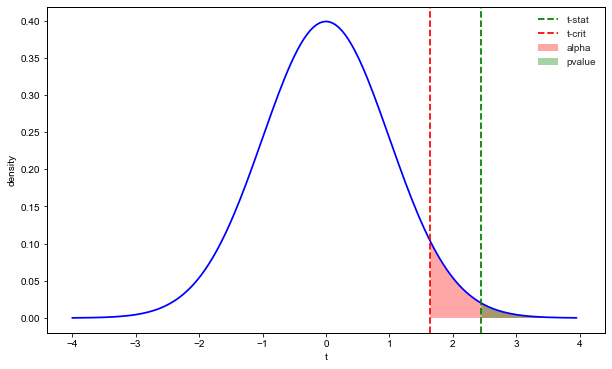

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

# Visualization
plt.style.use('seaborn')

# plot sample distribution 
x = np.arange(-4, 4, 0.05)
plt.plot(x, stats.t.pdf(x, df.shape[0]-1), 
         color='blue')

# plot alpha region
x_alpha = np.arange(t_crit, 4, 0.05)
y_alpha = stats.t.pdf(x_alpha, df.shape[0]-1)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(t_statistics, 4, 0.05)
y_pvalue = stats.t.pdf(x_pvalue, df.shape[0]-1)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(t_statistics, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

plt.legend()
plt.xlabel("t")
plt.ylabel("density")

fig.savefig("t-test.png",bbox_inches='tight',transparent=False,dpi=500)

## Confidence Interval

In [15]:
ci_low, ci_upp = _tconfint_generic(mean = mean_prod, 
                                   std_mean = std_prod, 
                                   dof = df.shape[0]-1, alpha=0.05, 
                                   alternative='two-sided')

print(f"Rata-rata produk yang dibeli per kostumer berada dalam rentang {ci_low:.0f} hingga {ci_upp:.0f}")

Rata-rata produk yang dibeli per kostumer berada dalam rentang -345 hingga 857


Dengan level signifikansi 5%, terdapat cukup bukti bahwa rata-rata produk yang dibeli per kostumer lebih dari 240 produk

# Regression Model
---

Source : [STAT 501: Regression Methods by Penn State's World Campus](https://online.stat.psu.edu/stat501/lesson/9/9.4)


<center>

| Tips      | Pattern |
| ----------- | ----------- |
| Use log transformation on the predictor only| <img src="https://online.stat.psu.edu/onlinecourses/sites/stat501/files/07transform/patterns4_plot.gif" width="280" height="200">!|
| Use log transformation on the outcome only, y| <img src="https://online.stat.psu.edu/onlinecourses/sites/stat501/files/07transform/patterns3_plot.gif" width="280" height="200">|
| Use log transformation on both the predictor and the outcome, x and y| <img src="https://online.stat.psu.edu/onlinecourses/sites/stat501/files/07transform/patterns5_plot.gif" width="280" height="200">|

</center>

Berdasarkan kurva diatas, maka akan dilakukan transformasi log pada nilai outome yaitu **Total Product**

In [16]:
df["log_TotalProduct"] = np.log(df["TotalProduct"])

In [17]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

## Fit Linear Regression (Single Predictor without Tranformation)

In [18]:
# Create OLS model object
model = smf.ols("TotalProduct ~ Income", df)

# Fit the model
results = model.fit()

# Extract the R-squared
results.rsquared

0.5607513291843286

In [19]:
rsq_single = results.rsquared
results_single = print_coef_std_err(results)
results_single["low_est_95"] = results_single.loc[:,"coef"] - (2 * results_single.loc[:,"std err"])
results_single["upp_est_95"] = results_single.loc[:,"coef"] + (2 * results_single.loc[:,"std err"])
results_single

,coef,std err,low_est_95,upp_est_95
Intercept,-317.128134,11.636317,-340.400768,-293.855500
Income,0.011095,0.000209,0.010677,0.011513


**Model regresi yang terbentuk :**


$$\text{TotalProduct} = -317.128134 + 0.011095\times\text{Income}$$
$$\text{TotalProduct} = 255.997281 + 0.011095(\text{Income} - 51655.924784)$$

pendapat
**Interpretasi model :** 
- rata-rata pembelian produk pada orang yang memiliki pendapat rata-rata adalah 255 produk
- perbedaan rata-rata pembelian produk antara dua orang yang berbeda penghasilan satu dollar adalah 0.011095, dan orang yang berpendapatan lebih tinggi mempunyai kecenderungan membeli produk lebih banyak


**Interpretasi prediction interval :**
- Sebanyak 95%, **Intercept** akan berada dalam rentang -340.4 dan -293.8
- Sebanyak 95%, **Income** akan berada dalam rentang 0.01067 dan 0.01151

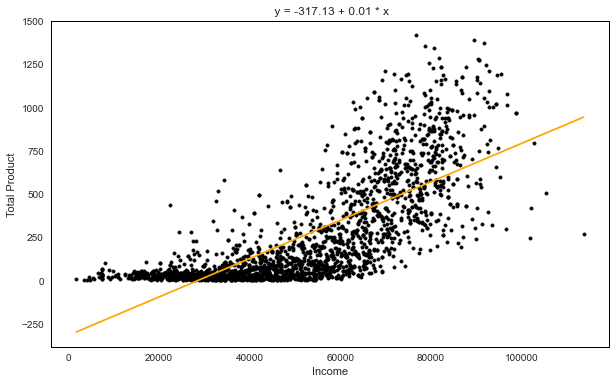

In [20]:
predictor = "Income"
outcome = "TotalProduct"
data = df.copy()
results_ = results_single.copy()

# scatter-plot data
x = df['Income']
y = df['TotalProduct']

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y, color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

ax.set_facecolor("white")

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "orange")

plt.ylabel("Total Product")
plt.xlabel("Income")
plt.title(f" y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x")

fig.savefig("single.png",bbox_inches='tight',transparent=False,dpi=500)
plt.show()

## Fit Linear Regression (Single Predictor with Log Tranformation)

In [21]:
# Create OLS model object
model = smf.ols("log_TotalProduct ~ Income", df)

# Fit the model
results = model.fit()

# Extract the R-squared
results.rsquared

0.5914229966379737

In [22]:
rsq_single_log = results.rsquared
results_single_log = print_coef_std_err(results)
results_single_log["low_est_95"] = results_single_log.loc[:,"coef"] - (2 * results_single_log.loc[:,"std err"])
results_single_log["upp_est_95"] = results_single_log.loc[:,"coef"] + (2 * results_single_log.loc[:,"std err"])
results_single_log

,coef,std err,low_est_95,upp_est_95
Intercept,1.587521,0.057406,1.472710,1.702332
Income,0.000058,0.000001,0.000056,0.000060


**Model regresi yang terbentuk :**


$$\text{log_TotalProduct} = 1.587521 + 0.000058\times\text{Income}$$


**Interpretasi model :** 
- 1% perbedaan positif dalam pendapatan, setara dengan 0.0058% perbedaan positif dalam total produk


**Interpretasi prediction interval :**
- Sebanyak 95%, **Intercept** akan berada dalam rentang 1.472710 dan 1.702332
- Sebanyak 95%, **Income** akan berada dalam rentang 0.000056 dan 0.000060

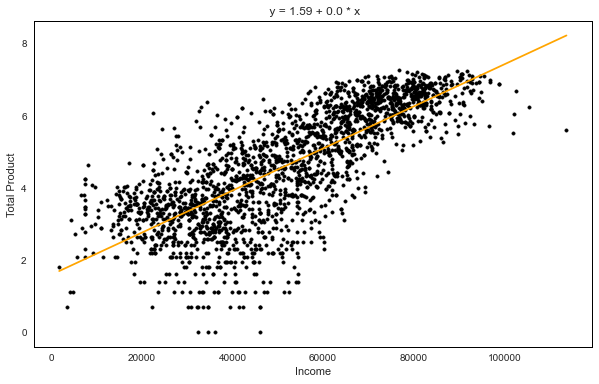

In [23]:
predictor = "Income"
outcome = "log_TotalProduct"
data = df.copy()
results_ = results_single_log.copy()

# scatter-plot data
x = df['Income']
y = df['log_TotalProduct']

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y, color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

ax.set_facecolor("white")

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "orange")

plt.ylabel("Total Product")
plt.xlabel("Income")
plt.title(f" y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x")

fig.savefig("single_logtransform.png",bbox_inches='tight',transparent=False,dpi=500)
plt.show()

## Fit Linear Regression (Multiple Predictors and Interaction without Tranformation)

In [24]:
# Create OLS model object
model = smf.ols("TotalProduct ~ Income + HaveChild + Income:HaveChild", df)

# Fit the model
results = model.fit()

# Extract the R-squared
results.rsquared

0.6880037323099913

In [25]:
rsq_multi = results.rsquared
results_multi = print_coef_std_err(results)
results_multi["low_est_95"] = results_multi.loc[:,"coef"] - (2 * results_multi.loc[:,"std err"])
results_multi["upp_est_95"] = results_multi.loc[:,"coef"] + (2 * results_multi.loc[:,"std err"])
results_multi

,coef,std err,low_est_95,upp_est_95
Intercept,-204.310165,20.894569,-246.099302,-162.521027
Income,0.011599,0.000303,0.010993,0.012205
HaveChild,16.707707,24.296953,-31.886198,65.301612
Income:HaveChild,-0.004556,0.000394,-0.005344,-0.003769


**Model regresi yang terbentuk :**


$$\text{TotalProduct} = -204.310165 + 0.011599\text{Income} + 16.707707\text{HaveChild} - 0.004556\text{Income}*\text{HaveChild} $$  



**Interpretasi model :** 


$$\text{HaveChild}=0, \text{TotalProduct} = -204.310165 + 0.011599\text{Income}$$
- Estimasi perbedaaan total produk pada orang yang tidak memiliki anak tetapi berbeda 1 dollar di pendapatan adalah 0.011599.


$$\text{HaveChild}=1, \text{TotalProduct} = -187.602458 + 0.007043\text{Income}$$
- Estimasi perbedaaan total produk pada orang yang memiliki anak tetapi berbeda 1 dollar di pendapatan adalah 0.007043.

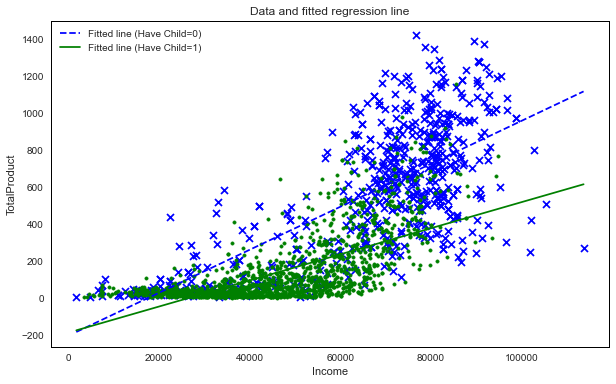

In [27]:
predictors = ["Income","HaveChild","Income:HaveChild"]
outcome = "TotalProduct"
data = df.copy()
results_ = results_multi.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain 
                 for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (Have Child={np.round(i, 0)})", 
             linestyle = linestyles[i])

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
fig.savefig("multiple.png",bbox_inches='tight',transparent=False,dpi=500)
plt.show()

## Fit Linear Regression (Multiple Predictors and Interaction with Log Tranformation)

In [28]:
# Create OLS model object
model = smf.ols("log_TotalProduct ~ Income + HaveChild + Income:HaveChild", df)

# Fit the model
results = model.fit()

# Extract the R-squared
results.rsquared

0.6381267243133699

In [29]:
rsq_multi_log = results.rsquared
results_multi_log = print_coef_std_err(results)
results_multi_log["low_est_95"] = results_multi_log.loc[:,"coef"] - (2 * results_multi_log.loc[:,"std err"])
results_multi_log["upp_est_95"] = results_multi_log.loc[:,"coef"] + (2 * results_multi_log.loc[:,"std err"])
results_multi_log

,coef,std err,low_est_95,upp_est_95
Intercept,2.869788,0.115105,2.639578,3.099997
Income,0.000046,0.000002,0.000043,0.000049
HaveChild,-1.305979,0.133848,-1.573675,-1.038283
Income:HaveChild,0.000009,0.000002,0.000004,0.000013


**Model regresi yang terbentuk :**


$$\text{log_TotalProduct} = 2.869788 + 0.000046\text{Income} - 1.305979\text{HaveChild} - 0.000009\text{Income}*\text{HaveChild} $$  



**Interpretasi model :** 


$$\text{HaveChild}=0, \text{log_TotalProduct} = 2.869788 + 0.000046\text{Income}$$
- 1% perbedaan positif dalam pendapatan pada orang yang tidak memiliki anak, setara dengan 0.0046% perbedaan positif dalam total produk.


$$\text{HaveChild}=1, \text{log_TotalProduct} = 1.563808 + 0.000037\text{Income}$$
- 1% perbedaan positif dalam pendapatan pada orang yang memiliki anak, setara dengan 0.0037% perbedaan positif dalam total produk.

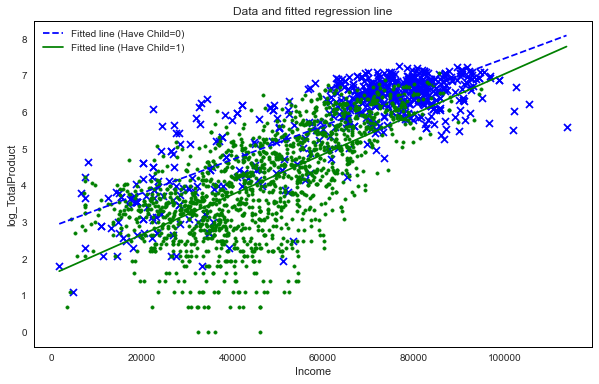

In [30]:
predictors = ["Income","HaveChild","Income:HaveChild"]
outcome = "log_TotalProduct"
data = df.copy()
results_ = results_multi_log.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain 
                 for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (Have Child={np.round(i, 0)})", 
             linestyle = linestyles[i])

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
fig.savefig("multiple_logtransform.png",bbox_inches='tight',transparent=False,dpi=500)
plt.show()

## Perbandingan R-Squared

Berdasarkan tabel R-Squared dibawah ini

<center>

|Treatment Model|R-Squared|
|:--|:--:|
|Single Predictor Without Transformation|0.56075|
|Single Predictor with Log Transformation|0.59142|
|Multiple Predictors and Interaction Without Transformation|0.68800|
|Multiple Predictors and Interaction with Log Transformation|0.63813|

</center>

Maka, model yang dipiilih yaitu **Model Regresi dengan Multiple Predictors (Income dan Have Child) tanpa treatment transformasi**

## Transformasi Linear

Untuk mempermudah interpretasi, akan dilakukan standarisasi Income dan HaveChild dengan menggunakan 2 standar deviasi

In [31]:
tmp = df['Income']

df['z2_Income'] = (tmp - np.mean(tmp)) / (2*np.std(tmp))

In [32]:
tmp = df['HaveChild']

df['z2_HaveChild'] = (tmp - np.mean(tmp)) / (2*np.std(tmp))

In [33]:
# Create OLS model object
model = smf.ols("TotalProduct ~ z2_Income + z2_HaveChild + z2_Income:z2_HaveChild", df)

# Fit the model
results = model.fit()

# Extract the R-squared
results.rsquared

0.6880037323099911

In [34]:
rsq_multi = results.rsquared
results_fix = print_coef_std_err(results)
results_fix["low_est_95"] = results_fix.loc[:,"coef"] - (2 * results_fix.loc[:,"std err"])
results_fix["upp_est_95"] = results_fix.loc[:,"coef"] + (2 * results_fix.loc[:,"std err"])
results_fix

,coef,std err,low_est_95,upp_est_95
Intercept,238.508400,3.948262,230.611876,246.404924
z2_Income,345.107066,8.245230,328.616607,361.597526
z2_HaveChild,-197.408222,8.263992,-213.936207,-180.880238
z2_Income:z2_HaveChild,-170.195669,14.706719,-199.609107,-140.782231


**Model regresi yang terbentuk :**


$$\text{TotalProduct} = 239 + 345\times\text{z2_Income} - 197\times\text{z2_HaveChild} - 170\times\text{z2_Income}*\text{z2_HaveChild} $$


**Interpretasi model :** 


$$\text{HaveChild}=0, \text{TotalProduct} = 239 + 345\times\text{z2_Income}$$
- Rata-rata total produk pada orang yang tidak memiliki anak dan memiliki pendapatan rata-rata adalah 239 produk.
- Estimasi perbedaaan total produk pada orang yang tidak memiliki anak tetapi berbeda 2 standar deviasi di pendapatan adalah 345 produk dan orang yang berpendapatan lebih tinggi mempunyai kecenderungan membeli produk lebih banyak.


$$\text{HaveChild}=1, \text{TotalProduct} = 42 + 175\times\text{z2_Income}$$
- Rata-rata total produk pada orang yang memiliki anak dan memiliki pendapatan sebesar rata-rata adalah 42 produk.
- Estimasi perbedaaan total produk pada orang yang memiliki anak tetapi berbeda 2 standar deviasi di pendapatan adalah 175 produk dan orang yang berpendapatan lebih tinggi mempunyai kecenderungan membeli produk lebih banyak

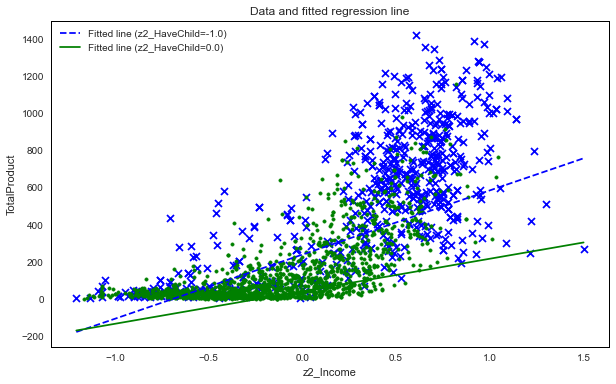

In [36]:
predictors = ["z2_Income","z2_HaveChild","z2_Income:z2_HaveChild"]
outcome = "TotalProduct"
data = df.copy()
results_ = results_fix.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}
list_ = data['z2_HaveChild'].unique()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(2):
    plt.scatter(data[data[predictors[1]]==list_[i]][predictors[0]], data[data[predictors[1]]==list_[i]][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain 
                 for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (z2_HaveChild={np.round(list_[i], 0)})", 
             linestyle = linestyles[i])

ax.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
fig.savefig("transformationlinear.png",bbox_inches='tight',transparent=False,dpi=500)
plt.show()

## Evaluation

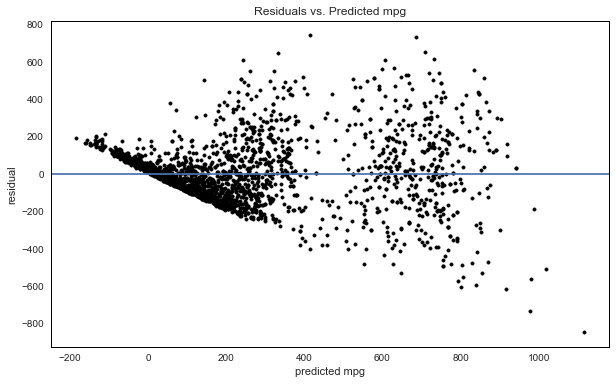

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

ax.set_facecolor("white")
plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")
fig.savefig("residual plot.png",bbox_inches='tight',transparent=False,dpi=500)

In [38]:
results.rsquared

0.6880037323099911

Residu menghasilkan pola sehingga melanggar asumsi Independence of errors meskipun fitted line menjelaskan lebih dari dua pertiga (69%) variasi total produk.

# Conclusion and Recommendation
---

**Conclusion**:


Statistical Test:
- Sengan tingkat keyakinan 95%, terdapat cukup bukti bahwa **rata-rata produk** yang dibeli per kostumer lebih dari 240 produk. Atau bisa dikatakan, melebihi target yang telah ditetapkan oleh kepala marketing.


Regression Model:
- Model dengan multiple predictors (Income dan HaveChild) and terdapat interaction pada kedua predictos tersebut tanpa melakukan transformasi non linear memiliki R-Squared lebih tinggi dibandingkan single predictor, single predictor-multiple predictors dengan transformasi non linear sebesar 68%.
- Dilakukan transformas linear dengan menggunakan 2 standar deviasi untuk mempermudah interpretasi model, dengan interpretasi model sebagai berikut:
    1. Rata-rata total produk pada orang yang tidak memiliki anak dan memiliki pendapatan rata-rata adalah 239 produk.
    2. Estimasi perbedaaan total produk pada orang yang tidak memiliki anak tetapi berbeda 2 standar deviasi di pendapatan adalah 345 produk dan orang yang berpendapatan lebih tinggi mempunyai kecenderungan membeli produk lebih banyak.
    3. Rata-rata total produk pada orang yang memiliki anak dan memiliki pendapatan sebesar rata-rata adalah 42 produk.
    4. Estimasi perbedaaan total produk pada orang yang memiliki anak tetapi berbeda 2 standar deviasi di pendapatan adalah 175 produk dan orang yang berpendapatan lebih tinggi mempunyai kecenderungan membeli produk lebih banyak
- Walaupun model menjelaskan 69% variasi total produk, asumsi independence of errors dilanggar karena residu membentuk pola tertentu

**Recommendations for the business**: 

Untuk meningkatkan penjualan produk, tim marketing dapat memprioritaskan promosi pada kostumer yang tidak memiliki anak dan pendapatan diatas rata-rata yaitu sebesar $51655

**Recommendation for the next experiment**: 

Pada analisa selanjutnya, perlu dilakukan treatment agar tidak melanggar asumsi independence of errors, seperti menggunakan Reciprocal Transform